# Problem statement

"To develop a predictive model to identify the factors that contribute to the severity of a vehicle accident based on various features such as the number of vehicles involved, engine capacity, age of vehicle, weather conditions, road surface conditions, urban or rural area, propulsion code, vehicle maneuver, towing and articulation, skidding and overturning, and the first point of impact."

The objective of this problem statement is to develop a machine learning model that can accurately predict the severity of an accident based on the given features. The model can be used to identify the contributing factors to the severity of accidents and help in developing strategies to reduce the frequency and severity of accidents.

The data for this problem is given in a special encoded format.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b> unzipping data

In [ ]:
!unzip -q "/content/drive/MyDrive/Freelance/Sri/road_acc_binary/Data.zip"

replace Data/testing_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


<b> Importing required libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn import metrics

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
train_df = pd.read_csv("/content/Data/training_set.csv")
test_df = pd.read_csv("/content/Data/testing_set.csv")

In [ ]:
train_df.head()

,Unnamed: 0,accident_severity,number_of_vehicles,engine_capacity_cc,age_of_vehicle,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,weather_conditions_9,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,road_surface_conditions_9,urban_or_rural_area_2,accident_year_2021,propulsion_code_2,propulsion_code_7,vehicle_manoeuvre_2,vehicle_manoeuvre_3,vehicle_manoeuvre_4,vehicle_manoeuvre_5,vehicle_manoeuvre_6,vehicle_manoeuvre_7,vehicle_manoeuvre_8,vehicle_manoeuvre_9,vehicle_manoeuvre_10,vehicle_manoeuvre_11,vehicle_manoeuvre_12,vehicle_manoeuvre_13,vehicle_manoeuvre_14,vehicle_manoeuvre_15,vehicle_manoeuvre_16,vehicle_manoeuvre_17,vehicle_manoeuvre_18,vehicle_manoeuvre_99,vehicle_type_19,towing_and_articulation_2,towing_and_articulation_3,towing_and_articulation_4,towing_and_articulation_5,towing_and_articulation_9,skidding_and_overturning_1,skidding_and_overturning_2,skidding_and_overturning_3,skidding_and_overturning_5,skidding_and_overturning_9,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,first_point_of_impact_4,first_point_of_impact_9
0,972755,3,2,1242,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,956023,3,2,998,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,939829,3,2,999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,928714,2,1,1560,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,733228,3,2,1388,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_df.head()

,Unnamed: 0,accident_severity,number_of_vehicles,engine_capacity_cc,age_of_vehicle,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,weather_conditions_9,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,road_surface_conditions_9,urban_or_rural_area_2,accident_year_2021,propulsion_code_2,propulsion_code_7,vehicle_manoeuvre_2,vehicle_manoeuvre_3,vehicle_manoeuvre_4,vehicle_manoeuvre_5,vehicle_manoeuvre_6,vehicle_manoeuvre_7,vehicle_manoeuvre_8,vehicle_manoeuvre_9,vehicle_manoeuvre_10,vehicle_manoeuvre_11,vehicle_manoeuvre_12,vehicle_manoeuvre_13,vehicle_manoeuvre_14,vehicle_manoeuvre_15,vehicle_manoeuvre_16,vehicle_manoeuvre_17,vehicle_manoeuvre_18,vehicle_manoeuvre_99,vehicle_type_19,towing_and_articulation_2,towing_and_articulation_3,towing_and_articulation_4,towing_and_articulation_5,towing_and_articulation_9,skidding_and_overturning_1,skidding_and_overturning_2,skidding_and_overturning_3,skidding_and_overturning_5,skidding_and_overturning_9,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,first_point_of_impact_4,first_point_of_impact_9
0,692319,3,3,1242,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,726673,2,2,1242,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,894444,3,2,1084,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,998488,3,1,1399,11,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,917152,3,2,998,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
train_df.columns

Index(['Unnamed: 0', 'accident_severity', 'number_of_vehicles',
       'engine_capacity_cc', 'age_of_vehicle', 'weather_conditions_2',
       'weather_conditions_3', 'weather_conditions_4', 'weather_conditions_5',
       'weather_conditions_6', 'weather_conditions_7', 'weather_conditions_8',
       'weather_conditions_9', 'road_surface_conditions_2',
       'road_surface_conditions_3', 'road_surface_conditions_4',
       'road_surface_conditions_5', 'road_surface_conditions_9',
       'urban_or_rural_area_2', 'accident_year_2021', 'propulsion_code_2',
       'propulsion_code_7', 'vehicle_manoeuvre_2', 'vehicle_manoeuvre_3',
       'vehicle_manoeuvre_4', 'vehicle_manoeuvre_5', 'vehicle_manoeuvre_6',
       'vehicle_manoeuvre_7', 'vehicle_manoeuvre_8', 'vehicle_manoeuvre_9',
       'vehicle_manoeuvre_10', 'vehicle_manoeuvre_11', 'vehicle_manoeuvre_12',
       'vehicle_manoeuvre_13', 'vehicle_manoeuvre_14', 'vehicle_manoeuvre_15',
       'vehicle_manoeuvre_16', 'vehicle_manoeuvre_17', 've

In [ ]:
train_df = train_df.drop('Unnamed: 0', axis =1)
test_df = test_df.drop('Unnamed: 0', axis =1)

- Let us only keep the test_Data for testing the model

In [ ]:
train_df.shape

(7403, 55)

In [ ]:
# let's check the data types of the columns in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   accident_severity           7403 non-null   int64
 1   number_of_vehicles          7403 non-null   int64
 2   engine_capacity_cc          7403 non-null   int64
 3   age_of_vehicle              7403 non-null   int64
 4   weather_conditions_2        7403 non-null   int64
 5   weather_conditions_3        7403 non-null   int64
 6   weather_conditions_4        7403 non-null   int64
 7   weather_conditions_5        7403 non-null   int64
 8   weather_conditions_6        7403 non-null   int64
 9   weather_conditions_7        7403 non-null   int64
 10  weather_conditions_8        7403 non-null   int64
 11  weather_conditions_9        7403 non-null   int64
 12  road_surface_conditions_2   7403 non-null   int64
 13  road_surface_conditions_3   7403 non-null   int64
 14  road_sur

In [ ]:
# let's check for duplicate values in the data
train_df.duplicated().sum()

1007

In [ ]:
train_df = train_df.drop_duplicates()

In [ ]:
# let's check for missing values in the data
round(train_df.isnull().sum() / train_df.isnull().count() * 100, 2)

accident_severity            0.000
number_of_vehicles           0.000
engine_capacity_cc           0.000
age_of_vehicle               0.000
weather_conditions_2         0.000
weather_conditions_3         0.000
weather_conditions_4         0.000
weather_conditions_5         0.000
weather_conditions_6         0.000
weather_conditions_7         0.000
weather_conditions_8         0.000
weather_conditions_9         0.000
road_surface_conditions_2    0.000
road_surface_conditions_3    0.000
road_surface_conditions_4    0.000
road_surface_conditions_5    0.000
road_surface_conditions_9    0.000
urban_or_rural_area_2        0.000
accident_year_2021           0.000
propulsion_code_2            0.000
propulsion_code_7            0.000
vehicle_manoeuvre_2          0.000
vehicle_manoeuvre_3          0.000
vehicle_manoeuvre_4          0.000
vehicle_manoeuvre_5          0.000
vehicle_manoeuvre_6          0.000
vehicle_manoeuvre_7          0.000
vehicle_manoeuvre_8          0.000
vehicle_manoeuvre_9 

In [ ]:
# let's view the statistical summary of the numerical columns in the data
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_severity,6396.000,2.769,0.454,1.000,3.000,3.000,3.000,3.000
number_of_vehicles,6396.000,2.097,0.897,1.000,2.000,2.000,2.000,12.000
engine_capacity_cc,6396.000,1280.523,206.324,998.000,1084.000,1242.000,1399.000,1999.000
age_of_vehicle,6396.000,9.260,5.036,0.000,5.000,9.000,13.000,39.000
weather_conditions_2,6396.000,0.134,0.341,0.000,0.000,0.000,0.000,1.000
weather_conditions_3,6396.000,0.006,0.078,0.000,0.000,0.000,0.000,1.000
weather_conditions_4,6396.000,0.015,0.120,0.000,0.000,0.000,0.000,1.000
weather_conditions_5,6396.000,0.018,0.134,0.000,0.000,0.000,0.000,1.000
weather_conditions_6,6396.000,0.001,0.035,0.000,0.000,0.000,0.000,1.000
weather_conditions_7,6396.000,0.008,0.089,0.000,0.000,0.000,0.000,1.000


- The accident severity variable ranges from 1 to 3, with 1 being the least severe and 3 being the most severe. The mean accident severity is 2.769, with a standard deviation of 0.454.

- The number of vehicles involved variable ranges from 1 to 12, with a mean of 2.097 and a standard deviation of 0.897.

- Finally, the engine capacity variable ranges from 998 cc to 1999 cc, with a mean of 1280.523 cc and a standard deviation of 206.324 cc. The quartiles suggest that most of the accidents involve cars with engine capacities between 998 cc and 1399 cc.





In [ ]:
# checking for value_counts in each nominal feature
columns = ['accident_severity', 'number_of_vehicles','engine_capacity_cc', 'age_of_vehicle']
for i in columns:
    print("Unique values in", i, "are :")
    print(train_df[i].value_counts())
    print("*" * 50)

Unique values in accident_severity are :
3    5012
2    1292
1      92
Name: accident_severity, dtype: int64
**************************************************
Unique values in number_of_vehicles are :
2     3882
1     1256
3      867
4      261
5       82
6       26
7       10
8        5
9        3
10       2
12       1
11       1
Name: number_of_vehicles, dtype: int64
**************************************************
Unique values in engine_capacity_cc are :
1242    2010
998     1376
1388     998
1596     522
1399     472
1560     328
1499     227
999      129
1084     124
1299      90
1999      68
1496      31
1117       5
1118       3
1250       2
1200       2
1796       1
1300       1
1400       1
1995       1
1396       1
1597       1
1600       1
1392       1
1119       1
Name: engine_capacity_cc, dtype: int64
**************************************************
Unique values in age_of_vehicle are :
12    474
6     445
11    429
5     426
7     410
13    409
10    398
8     393
4

- The variable accident_severity has three unique values with code 1, 2, and 3, where 3 has the highest count of 5012. The variable number_of_vehicles has 12 unique values with code ranging from 1 to 12, where 2 has the highest count of 3882. 
- The variable engine_capacity_cc has 26 unique values ranging from 998 to 1999, where 1242 has the highest count of 2010. The variable age_of_vehicle has 34 unique values ranging from 0 to 39, where 12 has the highest count of 474. These values can provide insights into the distribution and characteristics of the data for further analysis.

### EDA

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

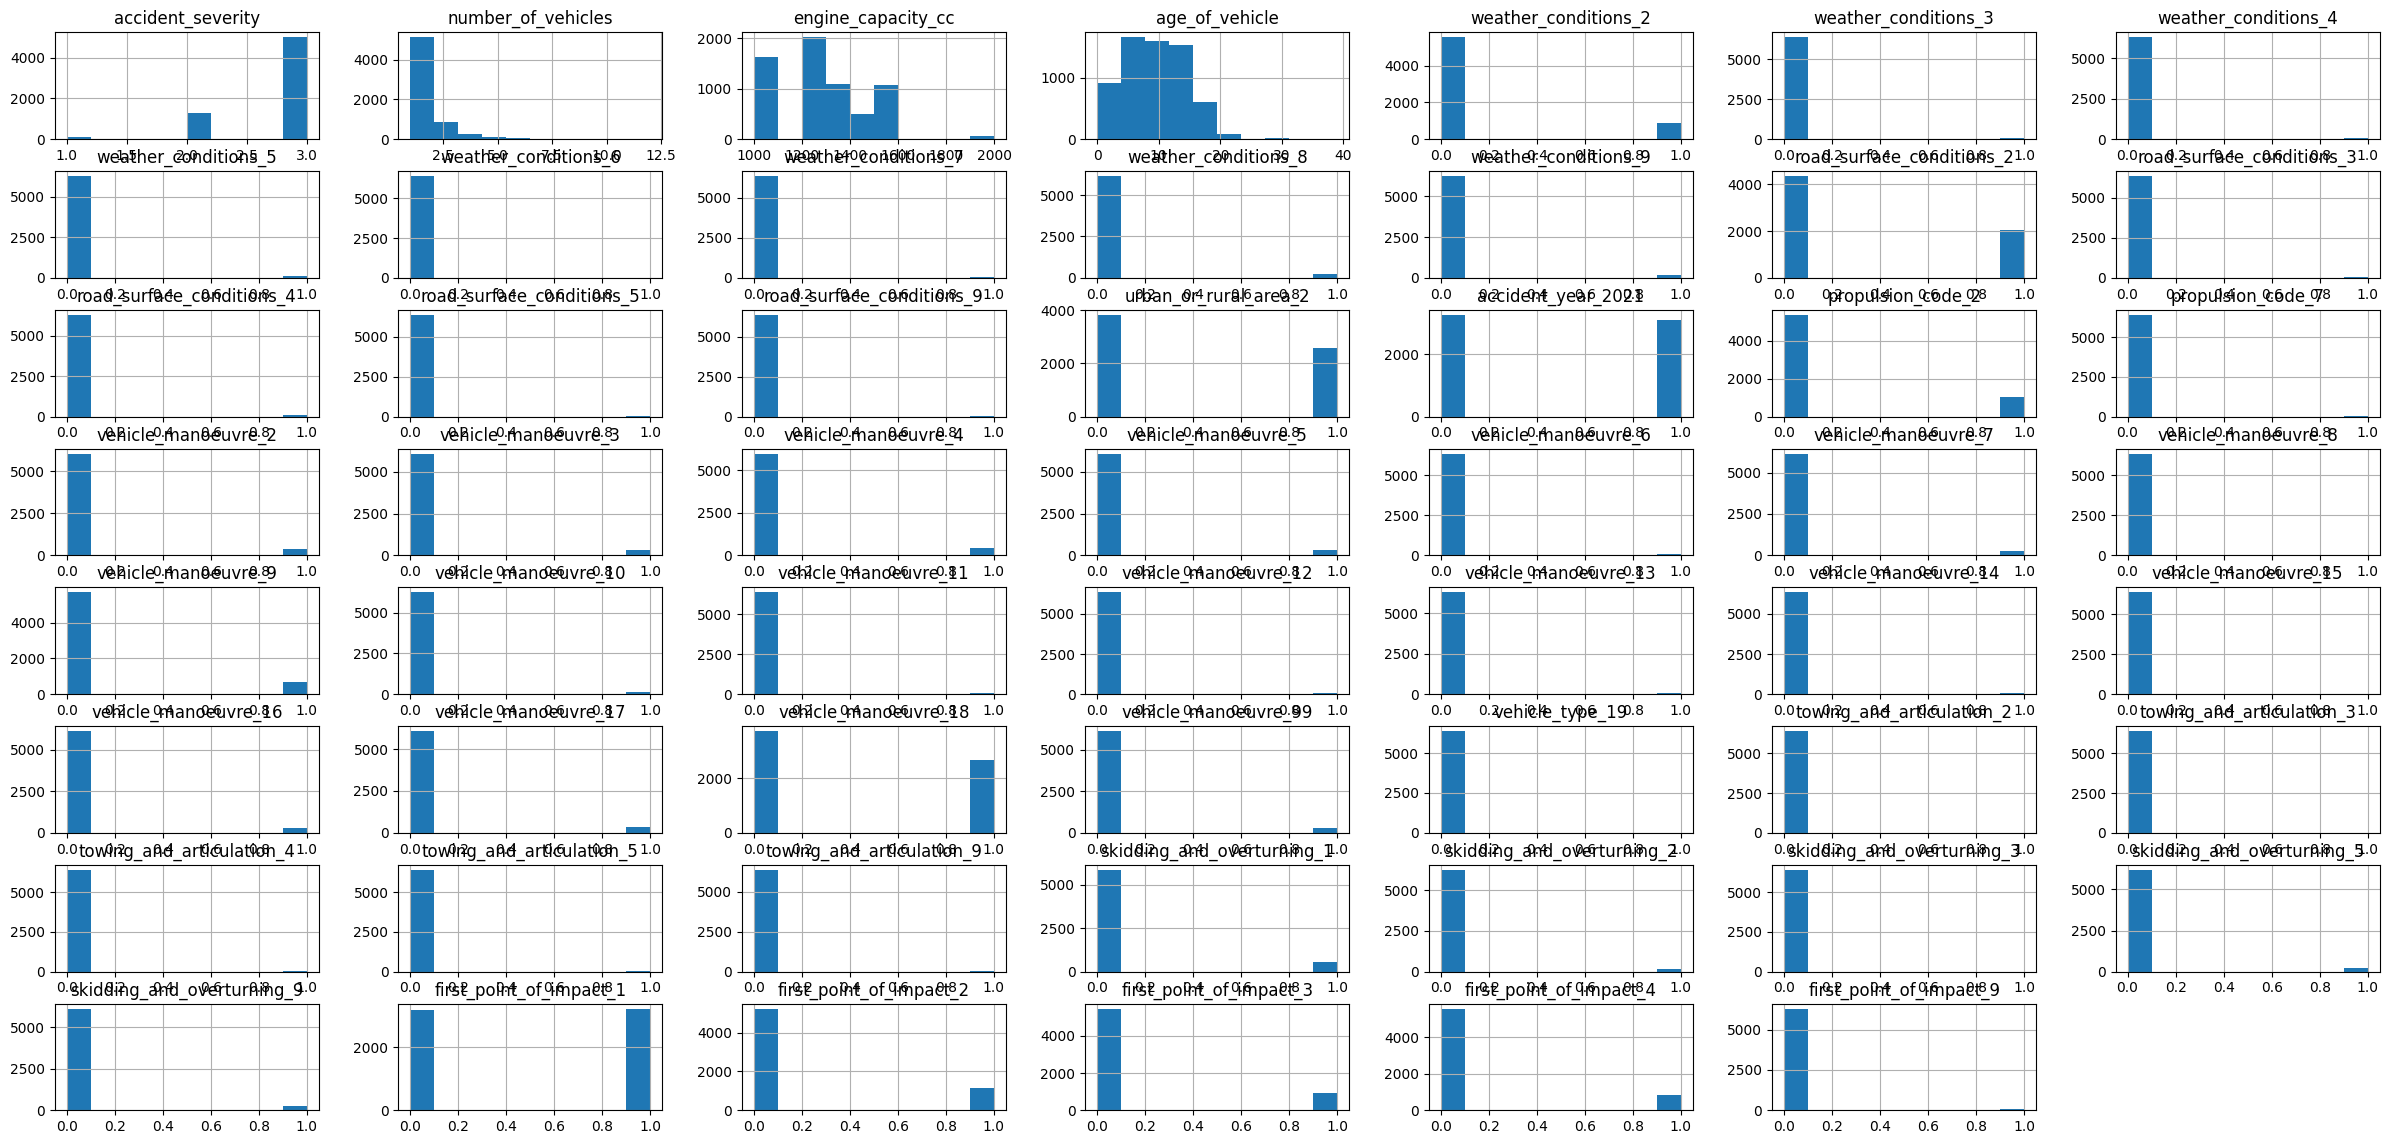

In [ ]:
# creating histograms
train_df.hist(figsize=(30, 14))
plt.show()

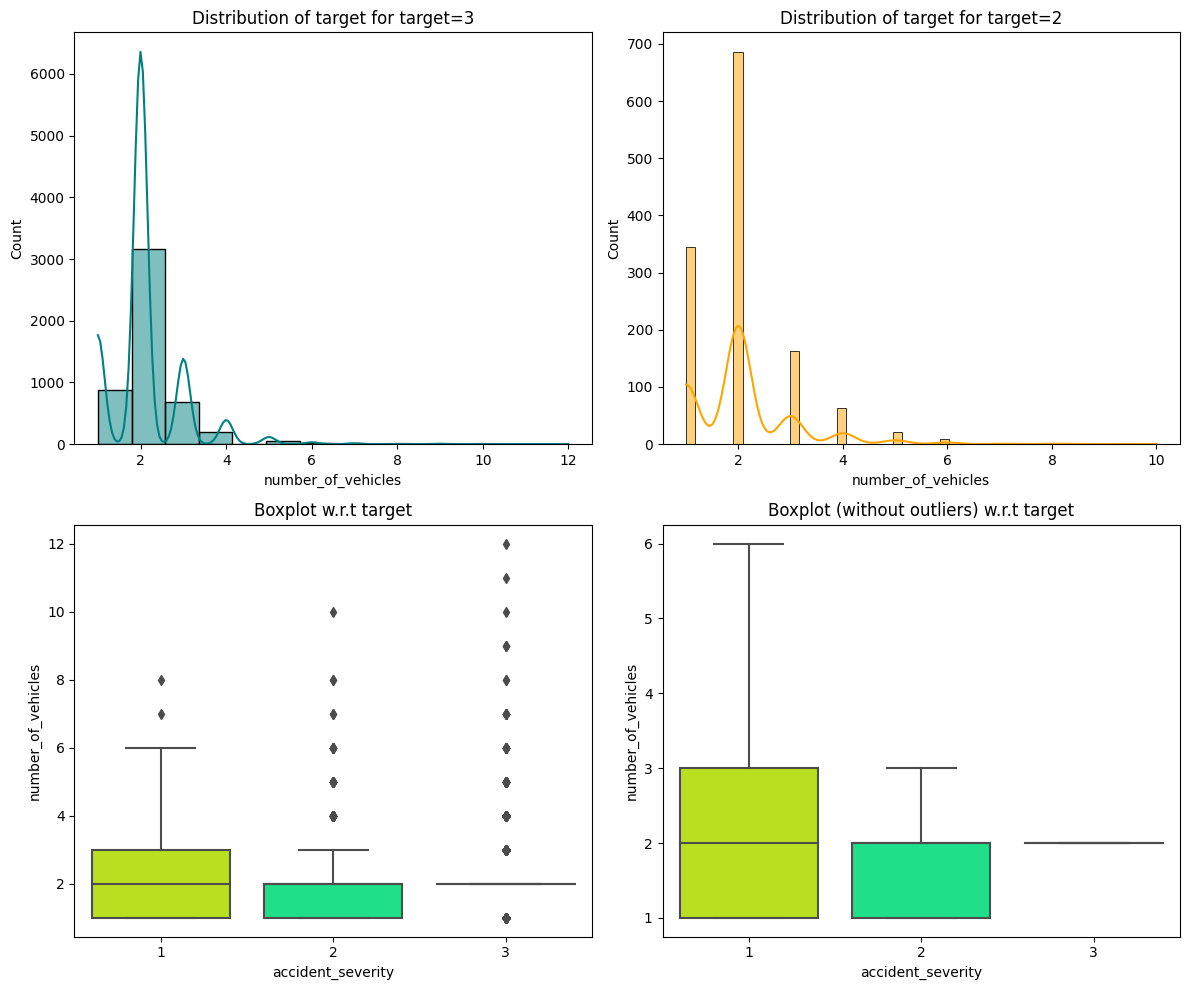

In [ ]:
distribution_plot_wrt_target(train_df, "number_of_vehicles", "accident_severity")

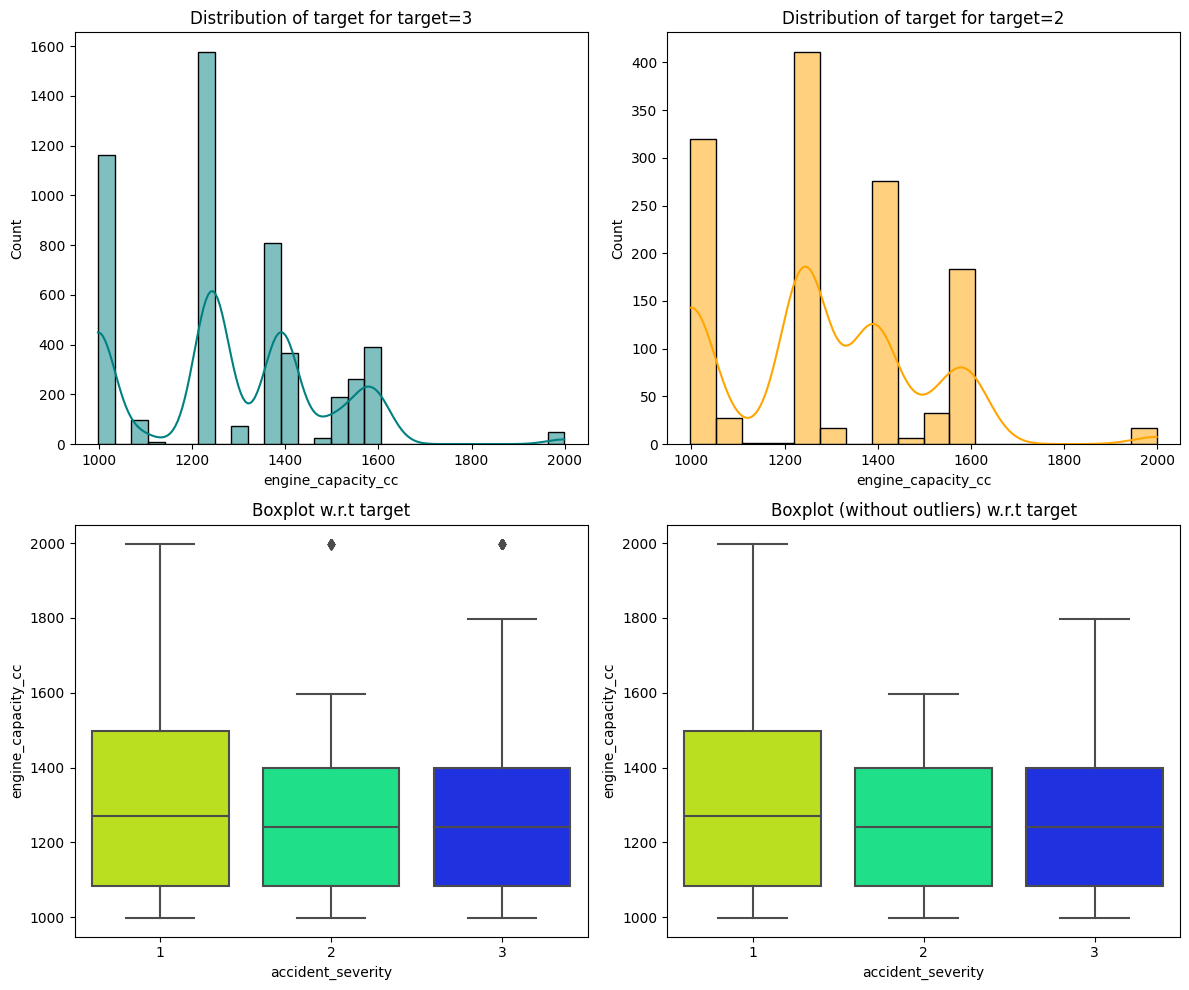

In [ ]:
distribution_plot_wrt_target(train_df, "engine_capacity_cc", "accident_severity")

- We can observe that most of the data is normally distributed and they are already one hot encoded vectors so it is easy to use them for modeling without further encoding

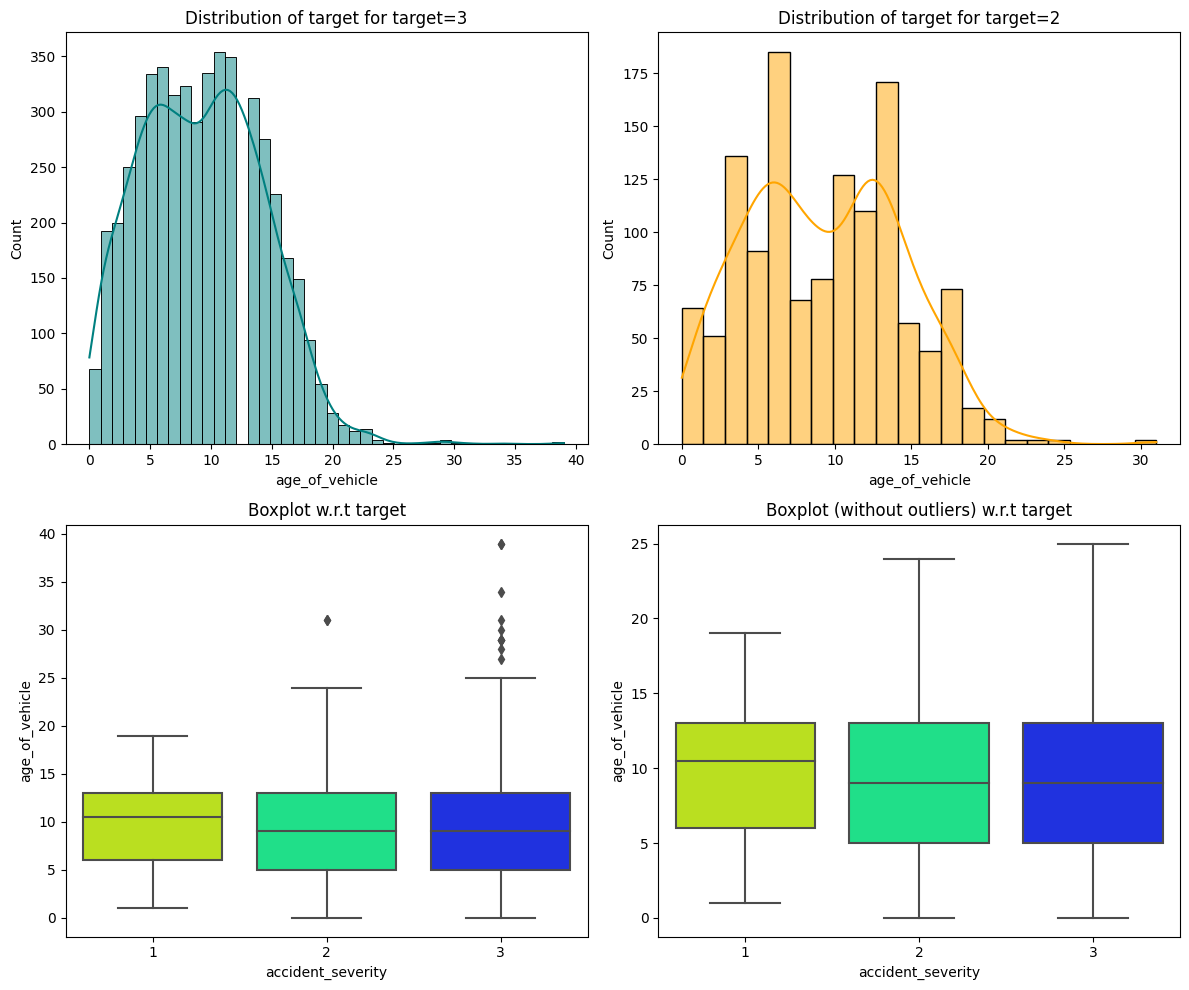

In [ ]:
distribution_plot_wrt_target(train_df, "age_of_vehicle", "accident_severity")

In [ ]:
train_df.head()

,accident_severity,number_of_vehicles,engine_capacity_cc,age_of_vehicle,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,weather_conditions_9,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,road_surface_conditions_9,urban_or_rural_area_2,accident_year_2021,propulsion_code_2,propulsion_code_7,vehicle_manoeuvre_2,vehicle_manoeuvre_3,vehicle_manoeuvre_4,vehicle_manoeuvre_5,vehicle_manoeuvre_6,vehicle_manoeuvre_7,vehicle_manoeuvre_8,vehicle_manoeuvre_9,vehicle_manoeuvre_10,vehicle_manoeuvre_11,vehicle_manoeuvre_12,vehicle_manoeuvre_13,vehicle_manoeuvre_14,vehicle_manoeuvre_15,vehicle_manoeuvre_16,vehicle_manoeuvre_17,vehicle_manoeuvre_18,vehicle_manoeuvre_99,vehicle_type_19,towing_and_articulation_2,towing_and_articulation_3,towing_and_articulation_4,towing_and_articulation_5,towing_and_articulation_9,skidding_and_overturning_1,skidding_and_overturning_2,skidding_and_overturning_3,skidding_and_overturning_5,skidding_and_overturning_9,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,first_point_of_impact_4,first_point_of_impact_9
0,3,2,1242,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,2,998,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,2,999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,1560,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,2,1388,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


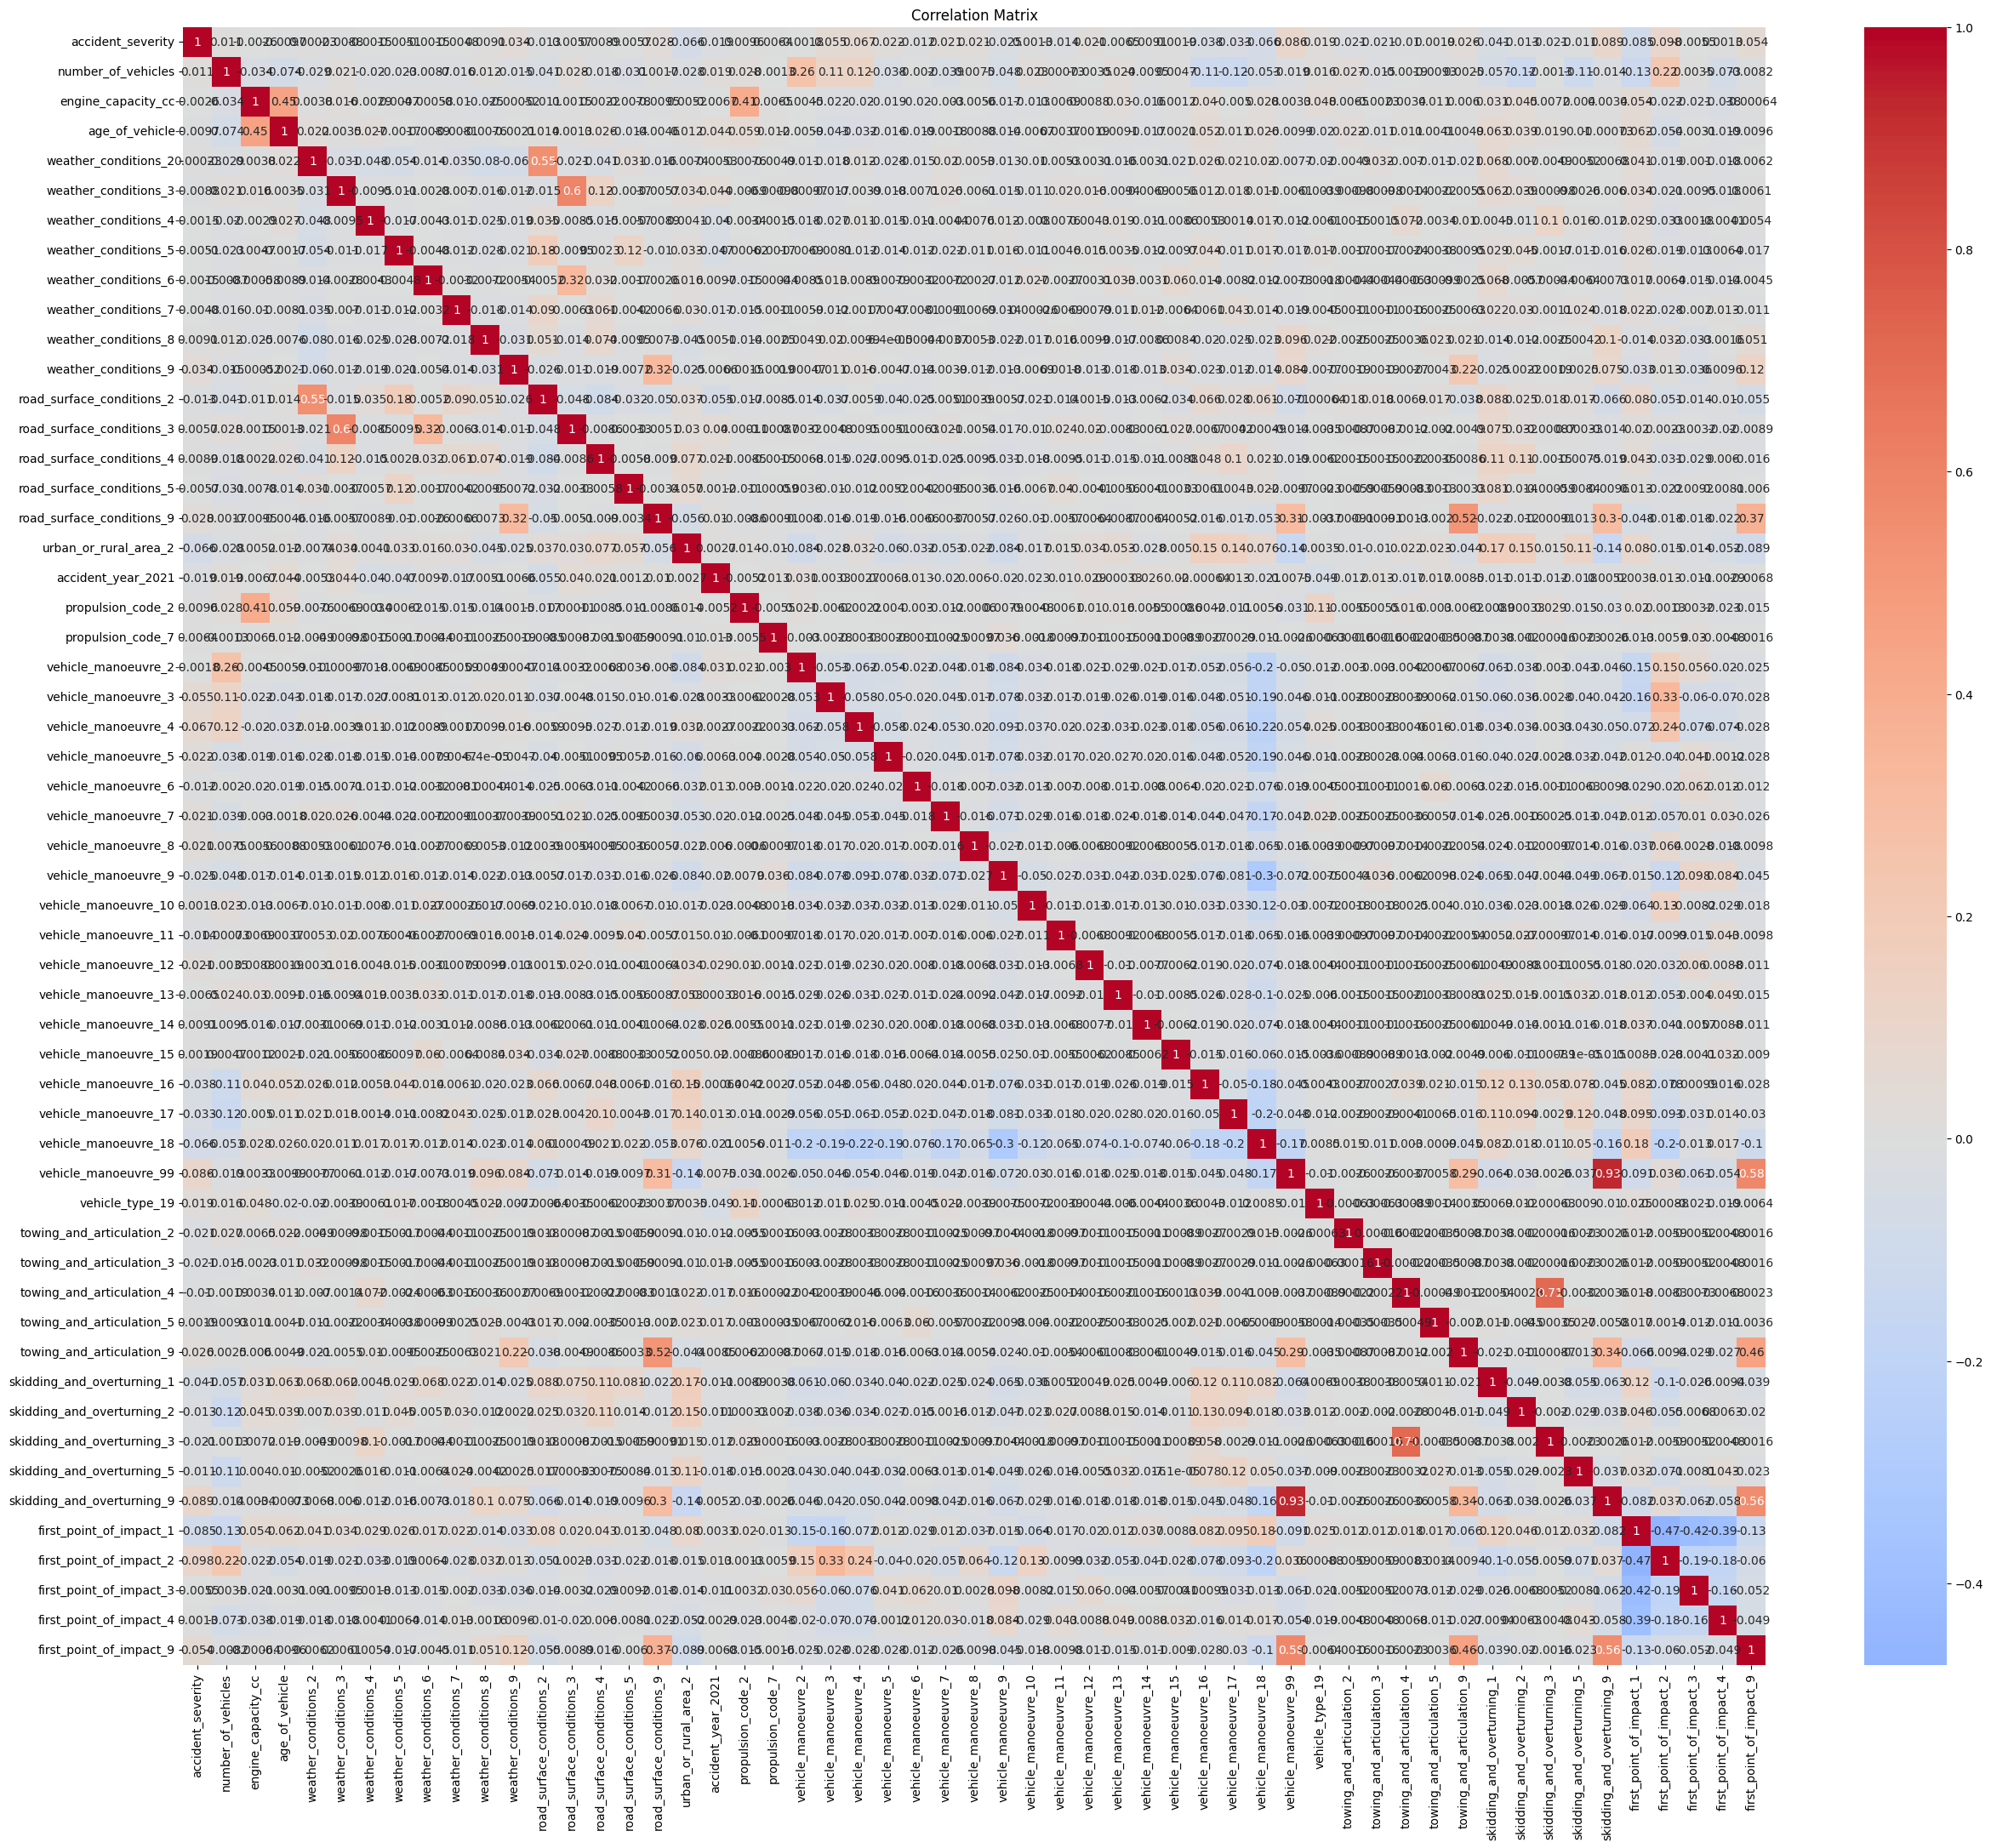

In [ ]:
corr_matrix = train_df.corr()

# Set the figure size
plt.figure(figsize=(30, 25))
# plot correlation matrix as heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Matrix')
plt.show()

- it seems most of the columns are not highly correlated and they are in the encoded format

<B> Making data ready for modeling

In [ ]:
X = train_df.drop(["accident_severity"], axis=1)
y = train_df["accident_severity"]

In [ ]:
# As we already have test data so we will just split data into train and vaidation

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_test = test_df.drop(["accident_severity"], axis=1)
y_test = test_df["accident_severity"]
print(X_train.shape, X_val.shape, X_test.shape)

(5116, 54) (1280, 54) (1851, 54)


In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

number_of_vehicles            0
engine_capacity_cc            0
age_of_vehicle                0
weather_conditions_2          0
weather_conditions_3          0
weather_conditions_4          0
weather_conditions_5          0
weather_conditions_6          0
weather_conditions_7          0
weather_conditions_8          0
weather_conditions_9          0
road_surface_conditions_2     0
road_surface_conditions_3     0
road_surface_conditions_4     0
road_surface_conditions_5     0
road_surface_conditions_9     0
urban_or_rural_area_2         0
accident_year_2021            0
propulsion_code_2             0
propulsion_code_7             0
vehicle_manoeuvre_2           0
vehicle_manoeuvre_3           0
vehicle_manoeuvre_4           0
vehicle_manoeuvre_5           0
vehicle_manoeuvre_6           0
vehicle_manoeuvre_7           0
vehicle_manoeuvre_8           0
vehicle_manoeuvre_9           0
vehicle_manoeuvre_10          0
vehicle_manoeuvre_11          0
vehicle_manoeuvre_12          0
vehicle_

### Building Models

In [ ]:
# Both the functions taken from google for reference as it is easy to plot usiing these functions
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average = "weighted")  # to compute Recall
    precision = precision_score(target, pred, average = 'weighted')  # to compute Precision
    f1 = f1_score(target, pred, average = 'weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3,3)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Models with the Org. Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val), average = "weighted")
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.7836200156372166
Bagging: 0.9552384675527756
Random forest: 0.9648162627052385
GBM: 0.790852228303362
Adaboost: 0.7832290852228303
dtree: 0.9648162627052385

Validation Performance:

Logistic regression: 0.78359375
Bagging: 0.67578125
Random forest: 0.72421875
GBM: 0.7796875
Adaboost: 0.78359375
dtree: 0.63125


- Logistic Regression: This is a linear model that uses a logistic function to predict the probability of an outcome. It is commonly used for binary classification problems.

- Bagging: This is an ensemble method that combines multiple models (usually decision trees) to make a prediction. It does this by training each model on a random subset of the training data, and then averaging the predictions.

- Random Forest: This is another ensemble method that uses decision trees, but each tree is trained on a random subset of the features, as well as a random subset of the training data. This helps to reduce overfitting and improve the generalization of the model.

- Gradient Boosting Machine (GBM): This is a boosting algorithm that combines weak learners (usually decision trees) into a strong learner. It does this by iteratively training new trees to correct the mistakes of the previous trees, with a focus on difficult examples.

- Adaboost: This is another boosting algorithm that combines weak learners into a strong learner. It works by assigning higher weights to misclassified examples, and then training new weak learners to focus on these examples.

- Decision Tree: This is a simple non-parametric model that uses a tree structure to make a prediction. Each internal node of the tree represents a decision based on a feature, and each leaf node represents a class label.

<b> Models with oversampled data

In [ ]:
print("Before Oversampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '2': {} \n".format(sum(y_train == 2)))
print("Before Oversampling, counts of label '3': {} \n".format(sum(y_train == 3)))

sm = SMOTE(
    sampling_strategy="auto", k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("Before Oversampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("Before Oversampling, counts of label '2': {} \n".format(sum(y_train_over == 2)))
print("Before Oversampling, counts of label '3': {} \n".format(sum(y_train_over == 3)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '1': 74
Before Oversampling, counts of label '2': 1033 

Before Oversampling, counts of label '3': 4009 

Before Oversampling, counts of label '1': 4009
Before Oversampling, counts of label '2': 4009 

Before Oversampling, counts of label '3': 4009 

After Oversampling, the shape of train_X: (12027, 54)
After Oversampling, the shape of train_y: (12027,) 



- **SMOTE** stands for Synthetic Minority Over Sampling Technique, which is a data augmentation method commonly used in imbalanced classification problems. It generates new synthetic samples of the minority class by interpolating between existing minority samples. This helps to balance the class distribution and improve the performance of the classifier.

- The code you above uses the SMOTE class from the imblearn library to oversample the minority class in the training data. The sampling_strategy parameter is set to "auto", which means that SMOTE will automatically determine the appropriate sampling ratio to balance the class distribution. The k_neighbors parameter is set to 5, which specifies the number of nearest neighbors to use for generating synthetic samples. Finally, the random_state parameter is set to 1 for reproducibility.

- The fit_resample() method of the SMOTE class is then called on X_train and y_train to generate new synthetic samples of the minority class. The resulting oversampled data is then assigned to new variables X_train_over and y_train_over. These new variables can be used to train a classifier that is less biased towards the majority class, and hopefully improves the overall classification performance.

<b> Training all models on the oversampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val), average = "weighted")
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.529974224661179
Bagging: 0.9512762950029101
Random forest: 0.9604223829716472
GBM: 0.7080735012887669
Adaboost: 0.5965743743244367
dtree: 0.9604223829716472

Validation Performance:

Logistic regression: 0.48828125
Bagging: 0.59765625
Random forest: 0.64765625
GBM: 0.6125
Adaboost: 0.4640625
dtree: 0.575


### Models with undersampling of data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

- RandomUnderSampler is a technique used for handling imbalanced datasets in machine learning. It is used to randomly remove examples from the majority class in order to balance the dataset. This helps to prevent the model from being biased towards the majority class and can improve the performance of the model.

- In the code above, the RandomUnderSampler is initialized with a random_state of 1, which ensures that the sampling is reproducible. Then, the fit_resample method is called with the training data X_train and y_train as input. This method returns a new set of training data X_train_un and labels y_train_un, where the majority class has been undersampled to balance the classes. The new dataset can then be used to train a machine learning model that is less prone to bias towards the majority class.

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 2)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 3)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 2)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 3)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 74
Before Under Sampling, counts of label 'No': 1033 

Before Under Sampling, counts of label 'No': 4009 

After Under Sampling, counts of label 'Yes': 74
After Under Sampling, counts of label 'No': 74 

After Under Sampling, counts of label 'No': 74 

After Under Sampling, the shape of train_X: (222, 54)
After Under Sampling, the shape of train_y: (222,) 



<b> MOdels with undersampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val), average = "weighted")
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.5045045045045045
Bagging: 0.990990990990991
Random forest: 1.0
GBM: 0.8918918918918919
Adaboost: 0.545045045045045
dtree: 1.0

Validation Performance:

Logistic regression: 0.3953125
Bagging: 0.38515625
Random forest: 0.4171875
GBM: 0.45078125
Adaboost: 0.425
dtree: 0.3796875


- Looking at the training performance, it appears that the Bagging, Random Forest, and Decision Tree classifiers were able to achieve a recall score of 1.0, meaning that they correctly identified all positive examples in the undersampled training set. The GBM and Adaboost classifiers performed moderately well, achieving a recall score of 0.8919 and 0.5450, respectively.

- For the validation performance, we see that the Random Forest classifier achieved the highest recall score of 0.4172, while the GBM classifier was a close second with a score of 0.4508. The Bagging and Adaboost classifiers had similar recall scores of 0.3852 and 0.4250, respectively. The Logistic Regression and Decision Tree classifiers performed the worst on the validation set, with recall scores of 0.3953 and 0.3797, respectively.

- Overall, the Adaboost and GBM classifiers appear to be the good performing models on the dataset based on their recall scores on the validation set. 

### Tuning Adaboost and Gradient Boosting

<b> Tuning with undersampling of data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=nan:
CPU times: user 1.01 s, sys: 105 ms, total: 1.11 s
Wall time: 52.8 s


In [ ]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [ ]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.437,0.437,0.411,0.410


In [ ]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.505,0.505,0.659,0.570


<b> Tuning with Original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=nan:
CPU times: user 1.93 s, sys: 137 ms, total: 2.07 s
Wall time: 2min 20s


In [ ]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [ ]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.784,0.784,0.614,0.689


In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.784,0.784,0.614,0.689


### Tuning Gradient Boosting classifier

<B> Tuning with undersampled data

In [ ]:
%%time 

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=nan:
CPU times: user 1.62 s, sys: 108 ms, total: 1.73 s
Wall time: 1min 27s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.905,0.905,0.905,0.905


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.454,0.454,0.683,0.529


<b> Tuning with Original Data

In [ ]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=nan:
CPU times: user 4.32 s, sys: 250 ms, total: 4.57 s
Wall time: 5min 11s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.453,0.453,0.699,0.522


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.454,0.454,0.683,0.529


<b> It seems that Adaboost performs well so lets try to tune it on oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=nan:
CPU times: user 2.28 s, sys: 153 ms, total: 2.43 s
Wall time: 3min 2s


In [ ]:
tuned_adb3 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb3.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [ ]:
# Checking model's performance on training set
adb3_train = model_performance_classification_sklearn(tuned_adb3, X_train_over, y_train_over)
adb3_train

,Accuracy,Recall,Precision,F1
0,0.471,0.471,0.521,0.477


In [ ]:
# Checking model's performance on validation set
adb3_val = model_performance_classification_sklearn(tuned_adb3, X_val, y_val)
adb3_val

,Accuracy,Recall,Precision,F1
0,0.408,0.408,0.679,0.470


<b> Predicting with the best model on test data

In [ ]:
# Checking model's performance on validation set
adb_test = model_performance_classification_sklearn(tuned_adb2, X_test, y_test)
adb_test

,Accuracy,Recall,Precision,F1
0,0.810,0.810,0.657,0.725


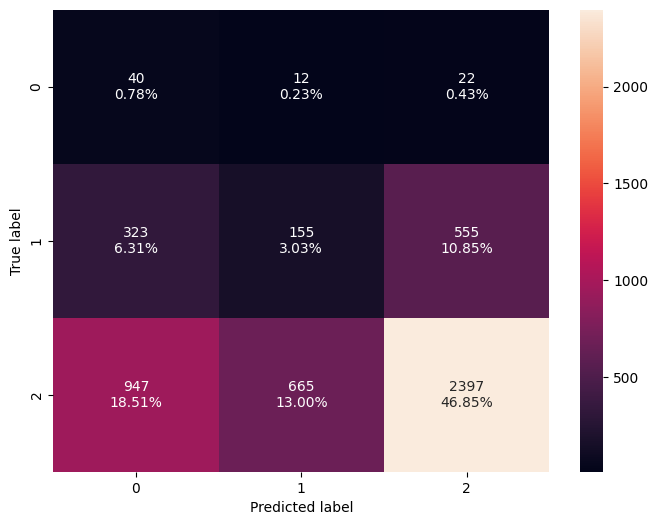

In [ ]:
confusion_matrix_sklearn(tuned_adb1, X_train, y_train)

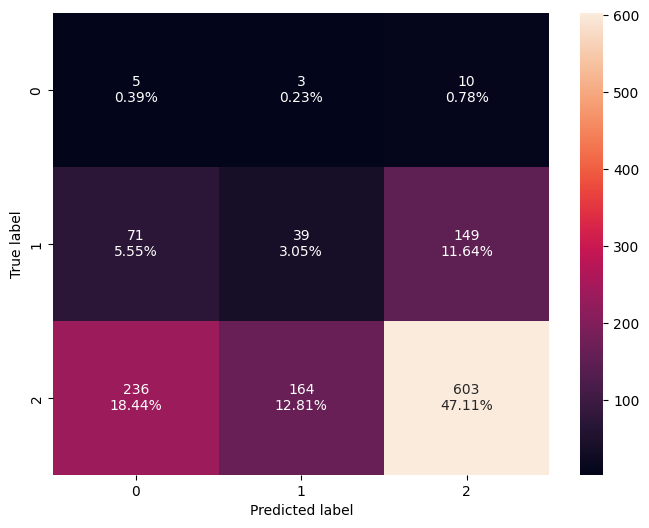

In [ ]:
confusion_matrix_sklearn(tuned_adb1, X_val, y_val)

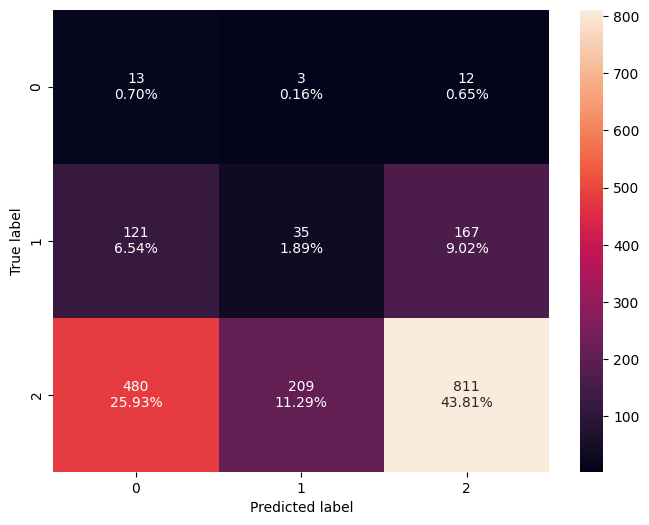

In [ ]:
confusion_matrix_sklearn(tuned_adb1, X_test, y_test)

### Model Performances comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
        adb3_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
    "Adaboost trained on Oversampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data,Adaboost trained on Oversampled data
Accuracy,0.905,0.453,0.437,0.784,0.471
Recall,0.905,0.453,0.437,0.784,0.471
Precision,0.905,0.699,0.411,0.614,0.521
F1,0.905,0.522,0.410,0.689,0.477


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T,adb3_val.T], axis=1,
)
models_train_comp_df.columns = [

    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
    "Adaboost trained on Oversampled data"
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data,Adaboost trained on Oversampled data
Accuracy,0.454,0.454,0.505,0.784,0.408
Recall,0.454,0.454,0.505,0.784,0.408
Precision,0.683,0.683,0.659,0.614,0.679
F1,0.529,0.529,0.570,0.689,0.470


<b>Conclusion

- The accuracy and recall of both gradient boosting and AdaBoost models trained with undersampled data are the same, indicating that undersampling did not have a significant impact on the model's ability to correctly classify samples.
- The accuracy and recall of both gradient boosting and AdaBoost models trained with original data are also the same, but they are lower than the corresponding values for the models trained with undersampled data. This suggests that oversampling may not always lead to better performance and can sometimes lead to overfitting.
- The AdaBoost model trained with original data has the highest accuracy and recall, indicating that using the original data may lead to better results than undersampling or oversampling.
- The precision of the gradient boosting model trained with undersampled data is higher than that of the model trained with original data, indicating that undersampling may be beneficial for certain metrics.
- The precision of the AdaBoost model trained with original data is lower than that of the model trained with undersampled data, indicating that using undersampled data may be better for this metric.
- The F1 score of the AdaBoost model trained with original data is the highest among all models, indicating that it may be the best overall performer. The F1 score of the gradient boosting model trained with undersampled data is also relatively high.




Based on the given data and model performance, it appears that the classification models are performing moderately well. The highest accuracy and recall are achieved by AdaBoost trained with Original data, but even this model has an accuracy of only 0.784 and a recall of 0.784.

The precision scores are not very high for any of the models, indicating that they are not able to effectively distinguish between the different classes in the dataset.

The F1 score, which is a combination of precision and recall, is highest for AdaBoost trained with Original data, but again, it is not very high at 0.689.

Overall, it seems that the given data may be difficult to accurately classify with the models that were trained. So it would be further recommended to analyse, Further analysis may be necessary to determine if additional features or a different approach to modeling could improve performance in a better way.



